In [1078]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
plt.show()
plt.close()
plt.rcParams.update({"font.size": 16})

<Figure size 432x288 with 0 Axes>

In [1079]:
import pandas as pd
import os

In [1080]:
import phenom

In [1081]:
import lal

In [1082]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

In [1083]:
import pycbc.types
import pycbc.psd
import pycbc.filter
import pycbc.waveform
import pycbc.waveform.utils

In [1084]:
import load_model_utils
import analysis_utils

In [1085]:
os.sys.path.append("/Users/sebastian.khan/personal/git/stk/ml/waveforms/oct2022/uncertainty")
import utils

In [1086]:
PP = load_model_utils.PhenProb(model_dir="model_100123")

In [1087]:
t = np.arange(-700, 100, 0.1)
q = 4

In [1088]:
# yhat_bar = PP.generate_amplitude(q, t, n_samples=-1)
# yhat_bar = PP.generate_frequency(q, t, n_samples=-1)
# yhat_bar = PP.generate_phase(q, t, n_samples=-1)

yhat_bar = PP.generate_h22(q, t, n_samples=-1)

In [1089]:
# yhat_samples = PP.generate_amplitude(q, t, n_samples=100)
# yhat_samples = PP.generate_frequency(q, t, n_samples=100)
# yhat_samples = PP.generate_phase(q, t, n_samples=100)

yhat_samples = PP.generate_h22(q, t, n_samples=100)

In [1090]:
yhat_bar.shape

(1, 8000)

In [1091]:
yhat_samples.shape

(100, 8000)

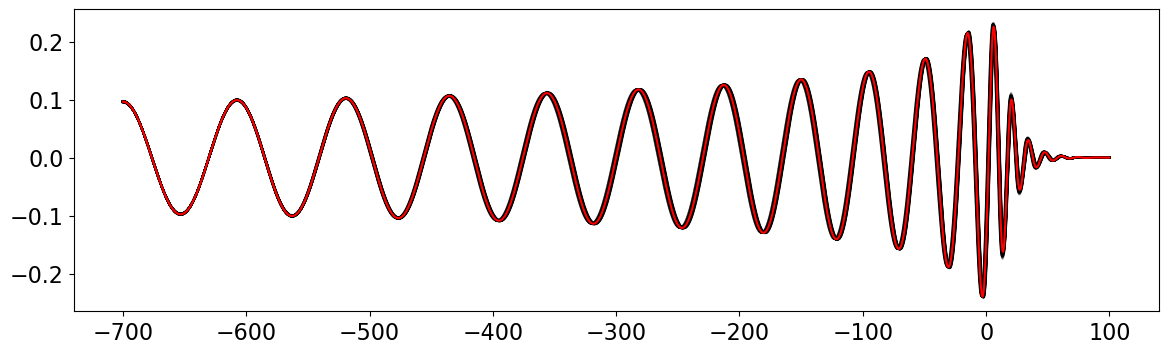

In [1092]:
plt.figure(figsize=(14, 4), dpi=100)
plt.plot(t, yhat_samples.T.real, alpha=0.5, color='k');
plt.plot(t, yhat_bar[0].real, c='r')
# plt.xlim(-100, 100)
# plt.yscale('log')

In [1093]:
hp_bar, hc_bar = PP.generate_pycbc_hp_hc(
    q,
    t,
    M=100.,
    delta_t=1/4096.,
    n_samples=1,
)

hp_samples, hc_samples = PP.generate_pycbc_hp_hc(
    q,
    t,
    M=100.,
    delta_t=1/4096.,
    n_samples=100,
)

In [1094]:
len(hp_bar)

1

In [1095]:
len(hp_samples)

100

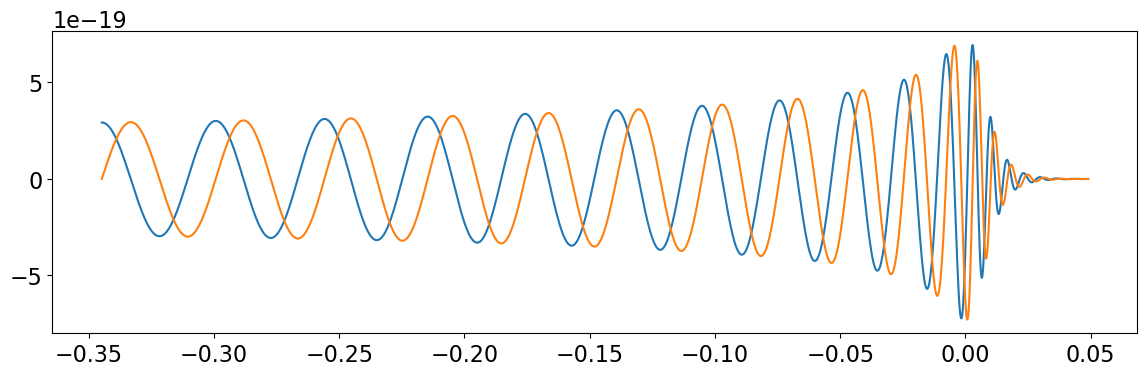

In [1096]:
plt.figure(figsize=(14, 4), dpi=100)
plt.plot(hp_bar[0].sample_times, hp_bar[0])
plt.plot(hc_bar[0].sample_times, hc_bar[0])

(-0.02, 0.03)

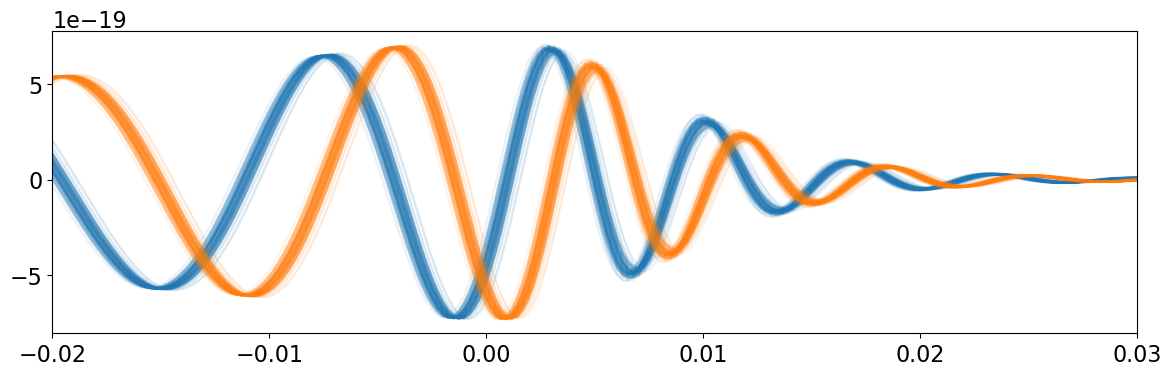

In [1097]:
plt.figure(figsize=(14, 4), dpi=100)

for hp in hp_samples:
    plt.plot(hp.sample_times, hp, c='C0', alpha=0.1)
for hc in hc_samples:
    plt.plot(hc.sample_times, hc, c='C1', alpha=0.1)
    
# plt.plot(hp_bar[0].sample_times, hp_bar[0], c='C0', lw=3)
# plt.plot(hc_bar[0].sample_times, hc_bar[0], c='C1', lw=3)
    
plt.xlim(-0.02, 0.03)

# load data

In [1098]:
catalogue_dir = "/Users/sebastian.khan/personal/data/non_spinning_catalogue_dec_2022"
names_to_drop=['RIT-BBH-0957-n084']
nr_data = analysis_utils.load_nr_data(catalogue_dir=catalogue_dir, names_to_drop=names_to_drop)

In [1099]:
nr_data['df'].query("q == 1")

name    q     fring     fdamp  duration  t_final  \
18   SXS_BBH_0180_Res3  1.0  0.088087  0.013596    9359.5    236.6   
20   SXS_BBH_0180_Res2  1.0  0.088087  0.013596    9354.6    236.8   
22   SXS_BBH_0180_Res4  1.0  0.088087  0.013596    9270.5    236.4   
27  RIT-eBBH-1090-n100  1.0  0.088087  0.013596    1493.9    362.0   
31   RIT-BBH-0112-n100  1.0  0.088087  0.013596   16963.4    419.5   

    start_freq_100Msun  
18           18.842745  
20           18.843902  
22           18.842414  
27           18.698119  
31           18.816687

In [1100]:
nr_data['df'].query("q == 4")
# 28

name    q    fring     fdamp  duration  t_final  \
1        q4a0_T_96_384  4.0  0.07433  0.014004    2202.1    229.5   
5        q4a0_T_80_320  4.0  0.07433  0.014004    2199.5    689.1   
9       q4a0_T_112_448  4.0  0.07433  0.014004    2202.5    151.8   
11   SXS_BBH_0167_Res5  4.0  0.07433  0.014004    3115.7    404.1   
14   SXS_BBH_0167_Res3  4.0  0.07433  0.014004    2874.0    403.8   
28  RIT-eBBH-1133-n100  4.0  0.07433  0.014004    2143.1    712.8   
44              GT0454  4.0  0.07433  0.014004    1855.1    495.1   

    start_freq_100Msun  
1            21.017192  
5            20.716335  
9            20.892015  
11           20.834667  
14           20.826849  
28           20.749856  
44           20.814909

In [1101]:
nr_data['df'].query("q == 8")
# 7

name    q     fring     fdamp  duration  t_final  \
2   q8a0a0_T_96_504n512  8.0  0.067697  0.014104     953.1    430.4   
3    q8a0a0c05_T_80_420  8.0  0.067697  0.014104     941.9    259.8   
7  q8a0a0_T_112_588n768  8.0  0.067697  0.014104     957.9    207.8   

   start_freq_100Msun  
2           22.213681  
3           21.837768  
7           22.608305

In [1102]:
nr_data['df'].query("q == 15")
# 33

name     q     fring     fdamp  duration  t_final  \
30  RIT-BBH-0942-n120  15.0  0.064066  0.014135    1162.8    330.2   
33  RIT-BBH-0373-n140  15.0  0.064066  0.014135    2725.0    437.6   

    start_freq_100Msun  
30           25.475422  
33           25.544053

In [1103]:
nr_data['df'].query("q == 32")
# 32

name     q     fring     fdamp  duration  t_final  \
34  RIT-BBH-0792-n120  32.0  0.061687  0.014149    1558.3    191.2   
39  RIT-BBH-1025-n100  32.0  0.061687  0.014149    1474.0    240.2   

    start_freq_100Msun  
34           28.943415  
39           28.463783

In [1104]:
nr_data['df']['q'].value_counts()

4.00     7
10.00    5
5.00     5
2.00     5
1.00     5
18.00    3
8.00     3
15.00    2
6.00     2
32.00    2
1.33     1
2.41     1
1.18     1
7.00     1
1.82     1
2.20     1
2.05     1
2.25     1
2.35     1
1.20     1
3.00     1
1.75     1
1.50     1
1.25     1
2.50     1
Name: q, dtype: int64

In [1105]:
idx = 28
q = nr_data['df']['q'].iloc[idx]
Mtotal = 100
delta_t = 1/4096.


# times for model
t = np.arange(-700, 100, 0.1)

In [1106]:
nr_data['times']

array([-775. , -774.9, -774.8, ...,   86.7,   86.8,   86.9])

In [1107]:
hp_nr, hc_nr = analysis_utils.get_nr_strain(
    q,
    nr_data['strains'][idx],
    nr_data['times'],
    Mtotal,
    delta_t,
)

In [1108]:
nr_data['df'].iloc[idx]

name                  RIT-eBBH-1133-n100
q                                    4.0
fring                            0.07433
fdamp                           0.014004
duration                          2143.1
t_final                            712.8
start_freq_100Msun             20.749856
Name: 28, dtype: object

In [1109]:
hp_bar, hc_bar = PP.generate_pycbc_hp_hc(
    q=q,
    times=t,
    M=Mtotal,
    delta_t=delta_t,
    n_samples=1,
)

hp_samples, hc_samples = PP.generate_pycbc_hp_hc(
    q=q,
    times=t,
    M=Mtotal,
    delta_t=delta_t,
    n_samples=500,
)

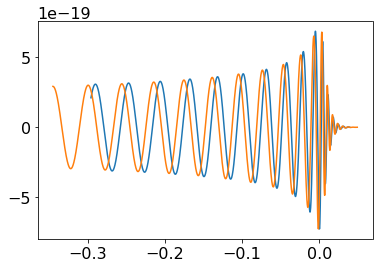

In [1110]:
plt.plot(hp_nr.sample_times, hp_nr)
plt.plot(hp_bar[0].sample_times, hp_bar[0])
# plt.xlim(-0.1,0.1)

In [1111]:
def compute_match(h1, h2, f_low):
    # Resize the waveforms to the same length
    tlen = max(len(h1), len(h2))
    h1.resize(tlen)
    h2.resize(tlen)

    # Generate the aLIGO ZDHP PSD
    delta_f = 1.0 / h1.duration
    flen = tlen//2 + 1
    psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, f_low)

    # Note: This takes a while the first time as an FFT plan is generated
    # subsequent calls are much faster.
    m, _ = pycbc.filter.match(h1, h2, psd=psd, low_frequency_cutoff=f_low)
    # m = pycbc.filter.overlap(h1, h2, psd=psd, low_frequency_cutoff=f_low)
    return m

In [1112]:
def my_coalign_waveforms(hp1, hc1, hp2, hc2, M, left_trim_M=200, end_time_M=80, psd=None,
                      low_frequency_cutoff=None,
                      high_frequency_cutoff=None,
                      resize=True):
    """
    https://github.com/gwastro/pycbc/blob/master/pycbc/waveform/utils.py#L44
    Generalised to work with hp and hc.
    
    M: total mass in Msun
    left_trim_M: number in M to crop off the start
    end_time_M: last time in M to crop to
    """
    from pycbc.filter import matched_filter
    mlen = pycbc.waveform.utils.ceilpow2(max(len(hp1), len(hp2)))

    hp1 = hp1.copy()
    hp2 = hp2.copy()
    
    hc1 = hc1.copy()
    hc2 = hc2.copy()

    if resize:
        hp1.resize(mlen)
        hp2.resize(mlen)
        hc1.resize(mlen)
        hc2.resize(mlen)
    elif len(hp1) != len(hp2) or len(hp2) % 2 != 0:
        raise ValueError("Time series must be the same size and even if you do "
                         "not allow resizing")

    snr = matched_filter(hp1, hp2, psd=psd,
                         low_frequency_cutoff=low_frequency_cutoff,
                         high_frequency_cutoff=high_frequency_cutoff)

    _, l =  snr.abs_max_loc()
    rotation =  snr[l] / abs(snr[l])
    hp1 = (hp1.to_frequencyseries() * rotation).to_timeseries()
    hp1.roll(l)
    
    hc1 = (hc1.to_frequencyseries() * rotation).to_timeseries()
    hc1.roll(l)

    hp1 = pycbc.types.TimeSeries(hp1, delta_t=hp2.delta_t, epoch=hp2.start_time)
    hc1 = pycbc.types.TimeSeries(hc1, delta_t=hc2.delta_t, epoch=hc2.start_time)
    
    # drop first 200M
    left_trim = phenom.MtoS(left_trim_M, M)
    # right_trim = hp1.sample_times[-1] - 0.03
    # right_trim = hp1.sample_times[-1] - phenom.MtoS(60, 100)
    right_trim = hp1.sample_times[-1] - phenom.MtoS(end_time_M, M)
    to_trim = [left_trim, right_trim]
    
    return hp1.crop(*to_trim), hc1.crop(*to_trim), hp2.crop(*to_trim), hc2.crop(*to_trim)

    # return hp1, hc1, hp2, hc2





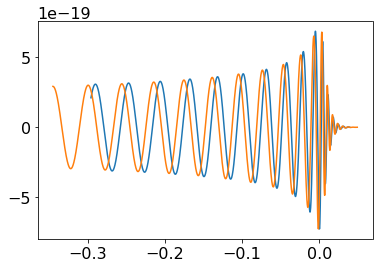

In [1113]:
plt.plot(hp_nr.sample_times, hp_nr)
plt.plot(hp_bar[0].sample_times, hp_bar[0])

In [1114]:
# hp1, hc1, hp2, hc2 = my_coalign_waveforms(hp_bar[0], hc_bar[0], hp_nr, hc_nr, low_frequency_cutoff=25)
hp1, hc1, hp2, hc2 = my_coalign_waveforms(hp_nr, hc_nr, hp_bar[0], hc_bar[0], low_frequency_cutoff=25, M=Mtotal)




In [1115]:
hp1s, hc1s, hp2s, hc2s = [], [], [], []
for i in range(len(hp_samples)):
    hp1_, hc1_, hp2_, hc2_ = my_coalign_waveforms(hp_nr, hc_nr, hp_samples[i], hc_samples[i], low_frequency_cutoff=25, M=Mtotal)
    hp1s.append(hp1_)
    hc1s.append(hc1_)
    hp2s.append(hp2_)
    hc2s.append(hc2_)

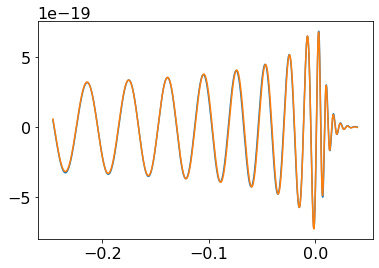

In [1116]:
plt.plot(hp1.sample_times, hp1)
plt.plot(hp2.sample_times, hp2)

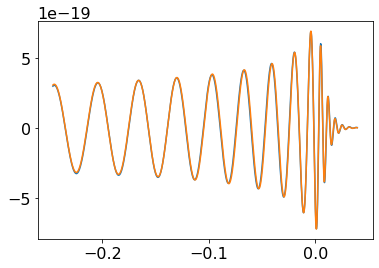

In [1117]:
plt.plot(hc1.sample_times, hc1)
plt.plot(hc2.sample_times, hc2)

In [1118]:
# hp1=hp1.crop(0, phenom.MtoS(250, 100))
# hp2=hp2.crop(0, phenom.MtoS(250, 100))

In [1119]:
# hc1=hc1.crop(0, phenom.MtoS(250, 100))
# hc2=hc2.crop(0, phenom.MtoS(250, 100))

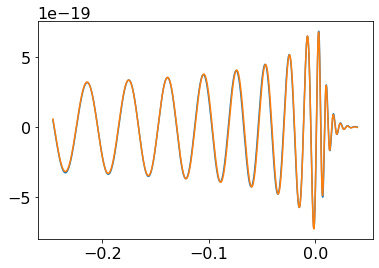

In [1120]:
plt.plot(hp1.sample_times, hp1)
plt.plot(hp2.sample_times, hp2)

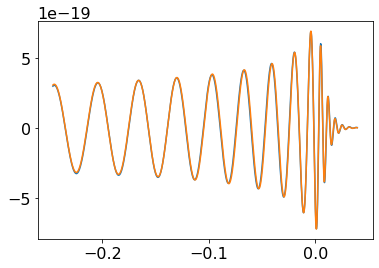

In [1121]:
plt.plot(hc1.sample_times, hc1)
plt.plot(hc2.sample_times, hc2)

In [1122]:
amp1 = pycbc.waveform.utils.amplitude_from_polarizations(hp1, hc1)
amp2 = pycbc.waveform.utils.amplitude_from_polarizations(hp2, hc2)

(-0.1, 0.03)

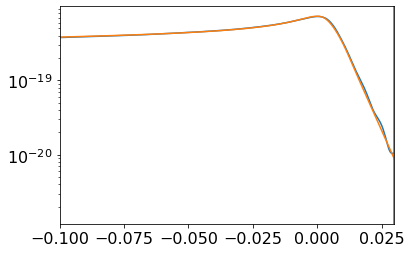

In [1123]:
plt.plot(amp1.sample_times, amp1)
plt.plot(amp2.sample_times, amp2)
plt.yscale('log')
plt.axvline(0.03)
plt.xlim(-0.1, 0.03)

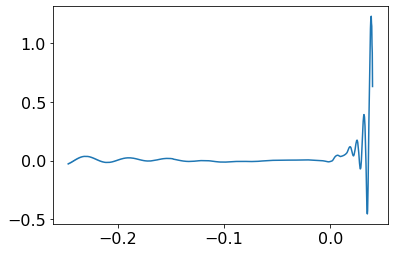

In [1124]:
plt.plot(amp1.sample_times, (amp1-amp2)/amp2)

In [1125]:
phi1 = pycbc.waveform.utils.phase_from_polarizations(hp1, hc1)
phi2 = pycbc.waveform.utils.phase_from_polarizations(hp2, hc2)

In [1126]:
phi1.shape

(1172,)

In [1127]:
phi2.shape

(1172,)

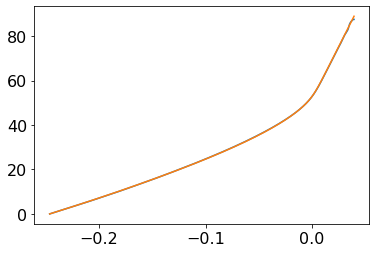

In [1128]:
plt.plot(phi1.sample_times, phi1)
plt.plot(phi2.sample_times, phi2)

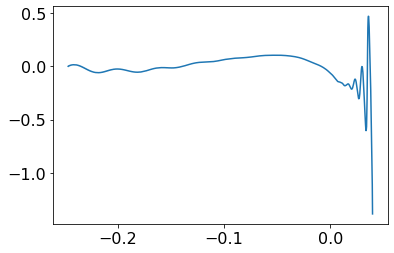

In [1129]:
plt.plot(phi1.sample_times, phi1-phi2)

In [1130]:
freq1 = pycbc.waveform.utils.frequency_from_polarizations(hp1, hc1)
freq2 = pycbc.waveform.utils.frequency_from_polarizations(hp2, hc2)

In [1131]:
freq1.shape

(1171,)

In [1132]:
freq2.shape

(1171,)

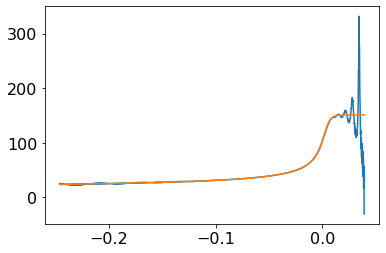

In [1133]:
plt.plot(freq1.sample_times, freq1)
plt.plot(freq2.sample_times, freq2)

(0.0, 0.04)

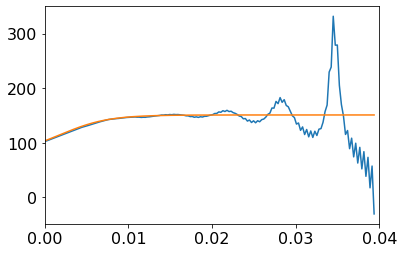

In [1134]:
plt.plot(freq1.sample_times, freq1)
plt.plot(freq2.sample_times, freq2)
plt.xlim(0, 0.04)

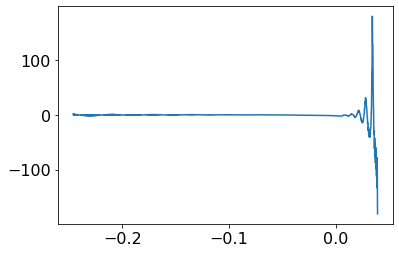

In [1135]:
plt.plot(freq1.sample_times, freq1-freq2)

In [1136]:
compute_match(hp1, hp2, 25)

0.9992740591671846

In [1137]:
hp1s, hc1s, hp2s, hc2s = [], [], [], []
for i in range(len(hp_samples)):
    hp1_, hc1_, hp2_, hc2_ = my_coalign_waveforms(hp_nr, hc_nr, hp_samples[i], hc_samples[i], low_frequency_cutoff=25, M=Mtotal)
    hp1s.append(hp1_)
    hc1s.append(hc1_)
    hp2s.append(hp2_)
    hc2s.append(hc2_)

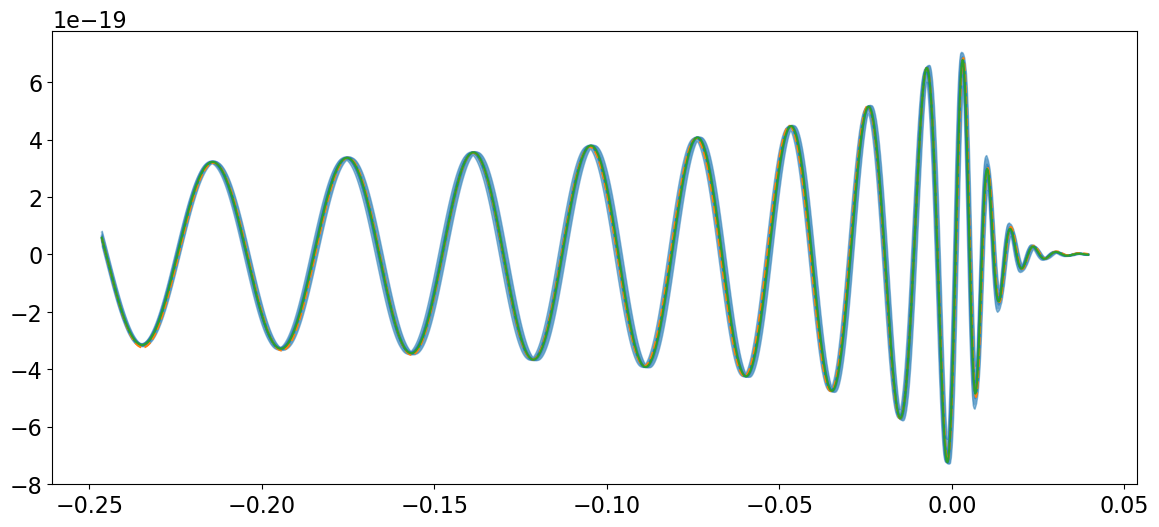

In [1138]:
plt.figure(figsize=(14,6), dpi=100)
vs=[]
for i in range(len(hp_samples)):
    vs.append(hp2s[i])
vs=np.array(vs)
plt.plot(hp2s[0].sample_times, vs[:10].T, c='C0', alpha=0.3)
plt.plot(hp2s[0].sample_times, vs.mean(0), c='C0')
plt.fill_between(hp2s[0].sample_times, y1=vs.min(0), y2=vs.max(0), color='C0', alpha=0.5)
plt.plot(hp1s[0].sample_times, hp1s[0], c='C1', ls='--')
plt.plot(hp2.sample_times, hp2, c='C2', ls='-')
# plt.xlim(-0.1,0.03)

In [1139]:
ms=[]
for i in range(len(hp1s)):
    ms.append(compute_match(hp1s[i], hp2s[i], 25))
ms=np.array(ms)

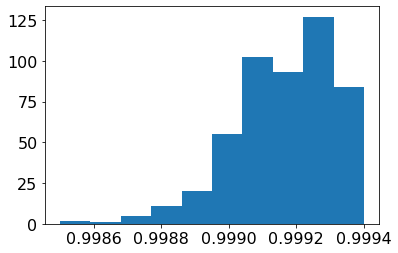

In [1140]:
plt.hist(ms);

In [1141]:
phi1s = []
phi2s = []
for i in range(len(hp_samples)):
    phi1_ = pycbc.waveform.utils.phase_from_polarizations(hp1s[i], hc1s[i])
    phi2_ = pycbc.waveform.utils.phase_from_polarizations(hp2s[i], hc2s[i])
    phi1s.append(phi1_)
    phi2s.append(phi2_)

In [1142]:
vs=[]
for i in range(len(hp_samples)):
    vs.append(phi2s[i])
vs=np.array(vs)

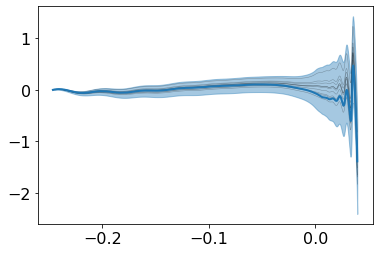

In [1143]:
phi_diff = (phi1_.numpy()[:,np.newaxis] - vs.T).T
plt.fill_between(phi1_.sample_times, y1=phi_diff.min(0), y2=phi_diff.max(0), color='C0', alpha=0.4)
plt.plot(phi1_.sample_times, phi_diff[:10].T, c='k', alpha=0.3, lw=0.5);
plt.plot(phi1.sample_times, phi1-phi2, c='C0', lw=2);

# adding in mulitple NR resolutions

In [1144]:
nr_data['df'].query("q == 4")

name    q    fring     fdamp  duration  t_final  \
1        q4a0_T_96_384  4.0  0.07433  0.014004    2202.1    229.5   
5        q4a0_T_80_320  4.0  0.07433  0.014004    2199.5    689.1   
9       q4a0_T_112_448  4.0  0.07433  0.014004    2202.5    151.8   
11   SXS_BBH_0167_Res5  4.0  0.07433  0.014004    3115.7    404.1   
14   SXS_BBH_0167_Res3  4.0  0.07433  0.014004    2874.0    403.8   
28  RIT-eBBH-1133-n100  4.0  0.07433  0.014004    2143.1    712.8   
44              GT0454  4.0  0.07433  0.014004    1855.1    495.1   

    start_freq_100Msun  
1            21.017192  
5            20.716335  
9            20.892015  
11           20.834667  
14           20.826849  
28           20.749856  
44           20.814909

In [1145]:
# nr_data['df']

In [1146]:
# loop over all NR cases for a single mass-ratio
# idxs = [11, 9, 28, 44]
idxs = nr_data['df'][nr_data['df']['q']==q].index
hp_nrs, hc_nrs = [], []

for idx in idxs:
    q=nr_data['df']['q'].iloc[idx]
    hp_nr_, hc_nr_ = analysis_utils.get_nr_strain(
        q,
        nr_data['strains'][idx],
        nr_data['times'],
        Mtotal,
        delta_t,
    )
    hp_nrs.append(hp_nr_)
    hc_nrs.append(hc_nr_)

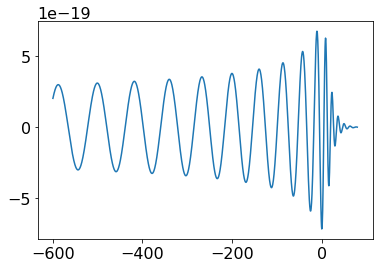

In [1147]:
plt.plot(phenom.StoM(hp_nrs[0].sample_times, Mtotal), hp_nrs[0])

In [1148]:
# use first as baseline comparison
hp1s, hc1s, hp2s, hc2s = [], [], [], []

nr_phi1s_ = []
nr_phi2s_ = []

for i in range(1, len(idxs)):
    hp1, hc1, hp2, hc2 = my_coalign_waveforms(hp_nrs[i], hc_nrs[i], hp_nrs[0], hc_nrs[0], low_frequency_cutoff=25, M=Mtotal, left_trim_M=100, end_time_M=80)
    hp1s.append(hp1)
    hc1s.append(hc1)
    hp2s.append(hp2)
    hc2s.append(hc2)
    
for i in range(len(hp1s)):
    nr_phi1_ = pycbc.waveform.utils.phase_from_polarizations(hp1s[i], hc1s[i])
    nr_phi2_ = pycbc.waveform.utils.phase_from_polarizations(hp2s[i], hc2s[i])
    nr_phi1s_.append(nr_phi1_)
    nr_phi2s_.append(nr_phi2_)

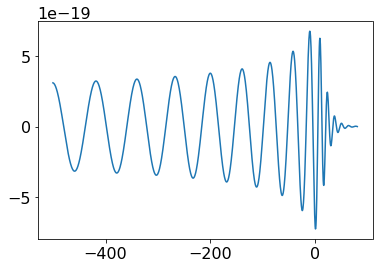

In [1149]:
plt.plot(phenom.StoM(hp1s[0].sample_times, Mtotal), hp1s[0])

(-1.0, 1.0)

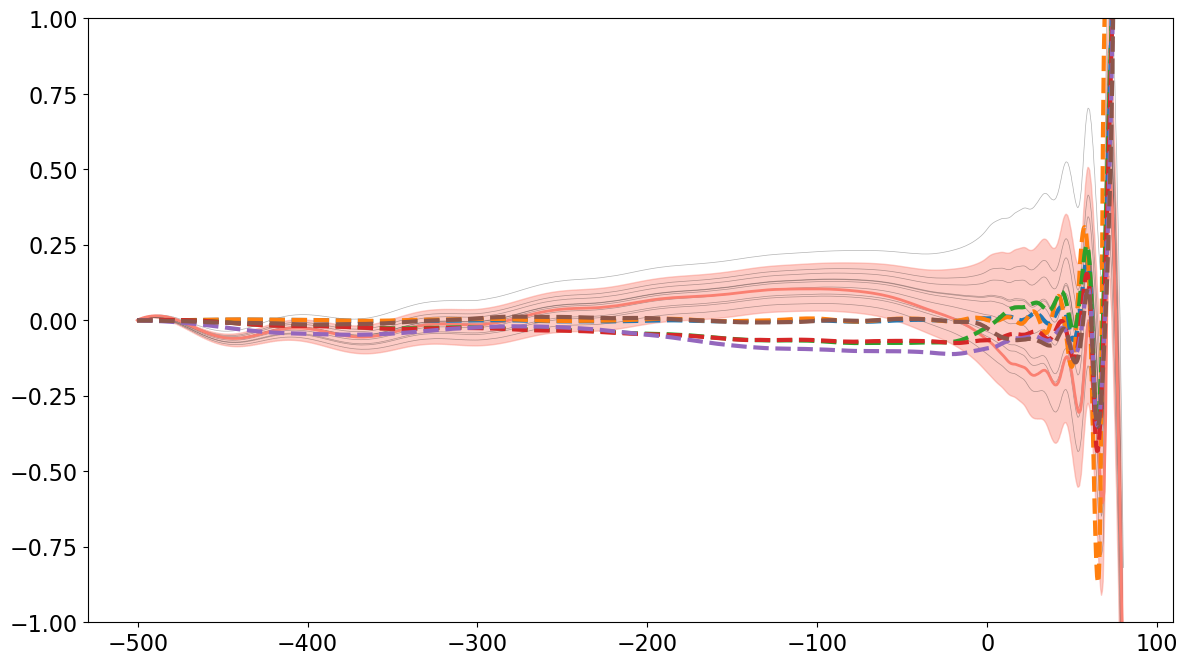

In [1150]:
plt.figure(figsize=(14, 8), dpi=100)

times_M = phenom.StoM(phi1_.sample_times, Mtotal)
nr_times_M = phenom.StoM(nr_phi1s_[0].sample_times, Mtotal)

phi_diff = (phi1_.numpy()[:,np.newaxis] - vs.T).T

# plt.fill_between(times_M, y1=phi_diff.min(0), y2=phi_diff.max(0), color='salmon', alpha=0.4)
plt.fill_between(times_M, y1=np.percentile(phi_diff, 5, 0), y2=np.percentile(phi_diff, 95, 0), color='salmon', alpha=0.4)

plt.plot(times_M, phi_diff[:10].T, c='k', alpha=0.3, lw=0.5);
plt.plot(times_M, phi1-phi2, c='salmon', lw=2);



for i in range(len(nr_phi1s_)):
    plt.plot(nr_times_M, nr_phi1s_[i]-nr_phi2s_[0], lw=3, ls='--')

plt.ylim(-1, 1)